# Analysis of Summary Motility Metrics in Pools
---

#### Overview

This notebook utilizes the summary motility metrics generated in `1_Compute-Summary-Motility-Metrics.ipynb` 

to examine the distributions across the variables of interest: time in water and position in tube. We plot the 1D distributions as split violin plots comparing each of the two values for both variables. Then we plot the 2D distributions and look at where groups differ.

In [1]:
from pathlib import Path
from itertools import combinations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Load Motility Metrics
---

Load summary motility metrics from all cells swimming in pools generated in `1_Compute...`.

#### Datasets
| Experiment ID | Date          | Substrate               |
|---------------|---------------|-------------------------|
| AMID-04       | 01 March 2024 | Agar microchamber pools |

#### Experimental parameters
| strain  | substrate      | position_in_tube | time_in_water |
|---------|----------------|------------------|---------------|
| cc1373  | pools          | top              | 4 hrs         |
|         |                | middle           | 21 hrs        |

#### Collect csv files

In [2]:
# read csv
csv_file = Path("../data/AMID-04_summary_motility_metrics.csv")
motility_metrics_dataframe = pd.read_csv(csv_file)

# preview
motility_metrics_dataframe.drop(["slide_ID", "well_ID"], axis=1).groupby(
    ["position_in_tube", "time_in_water"]
).head(2)

,total_time,total_distance,net_distance,max_sprint_length,confinement_ratio,mean_curvilinear_speed,mean_linear_speed,mean_angular_speed,num_rotations,num_direction_changes,pivot_rate,cell_count,experiment_ID,strain,substrate,position_in_tube,time_in_water,timelapse_ID,pool_ID
0,10.45209,405.988485,53.390512,15.908359,0.131507,38.842804,5.108118,4.151206,0.0,27,0.066504,3,AMID-04,cc1373,pools,top,21,1,2x2
1,19.95399,512.993208,40.957943,9.852008,0.079841,25.708804,2.052619,2.376976,1.0,31,0.060430,1,AMID-04,cc1373,pools,top,21,1,2x3
106,10.95219,404.716370,42.765079,12.655636,0.105667,36.953008,3.904706,5.948069,1.0,41,0.101306,1,AMID-04,cc1373,pools,middle,21,1,0x3
107,10.45209,159.507149,91.692263,5.664730,0.574847,15.260790,8.772625,2.556810,0.0,19,0.119117,1,AMID-04,cc1373,pools,middle,21,1,2x1
147,12.05241,383.777018,46.126915,12.327398,0.120192,31.842347,3.827194,4.739750,0.0,45,0.117256,1,AMID-04,cc1373,pools,top,4,1,3x0
148,19.95399,212.116625,57.029161,7.829469,0.268858,10.630286,2.858033,4.896504,1.0,55,0.259291,2,AMID-04,cc1373,pools,top,4,2,1x2
217,19.90398,442.167211,56.904333,8.571013,0.128694,22.215015,2.858942,1.685006,0.0,21,0.047493,1,AMID-04,cc1373,pools,middle,4,1,1x0
218,10.10202,596.514748,31.972098,19.583767,0.053598,59.049056,3.164921,2.292473,0.0,16,0.026822,1,AMID-04,cc1373,pools,middle,4,1,1x3


## 1D Analysis
---

Select metrics for which to show univariate distributions.

In [3]:
# set metrics
metrics_subset = [
    "confinement_ratio",
    "mean_curvilinear_speed",
    "mean_angular_speed",
]

# set experimental variables
experimental_variables = [
    "position_in_tube",
    "time_in_water",
]

#### Univariate distributions

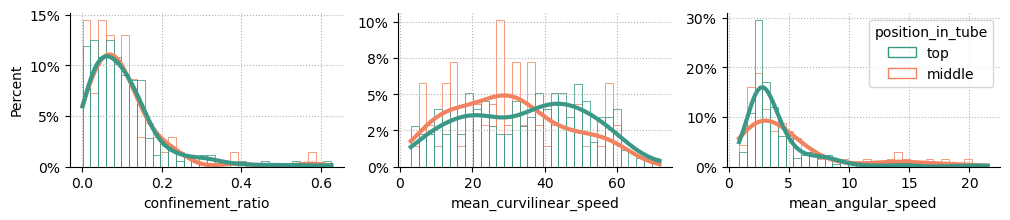

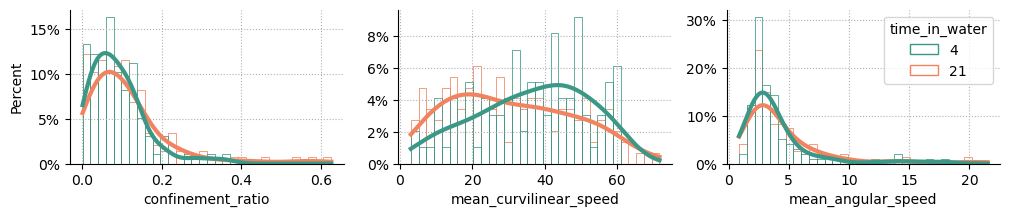

In [4]:
# loop through experimental variables
# (position in tube and time in water)
for variable in experimental_variables:
    # create figure
    ncols = len(metrics_subset)
    fig, axes = plt.subplots(
        ncols=ncols,
        figsize=(4 * ncols, 2),
    )

    # loop through select metrics
    for i, metric in enumerate(metrics_subset):
        last = len(metrics_subset) - 1
        legend = True if i == last else False
        ylabel = "Percent" if i == 0 else ""

        # render univariate distribution
        sns.histplot(
            data=motility_metrics_dataframe,
            x=metric,
            hue=variable,
            palette=["#3B9886", "#F28360"],
            fill=False,
            kde=True,
            line_kws={"lw": 3},
            bins=32,
            stat="percent",
            common_norm=False,
            legend=legend,
            ax=axes.flat[i],
        )

        # aesthetics
        axes[i].set_ylabel(ylabel)
        axes[i].grid(ls=":")
        axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
        sns.despine(ax=axes[i])

#### Time in water with position in tube fixed

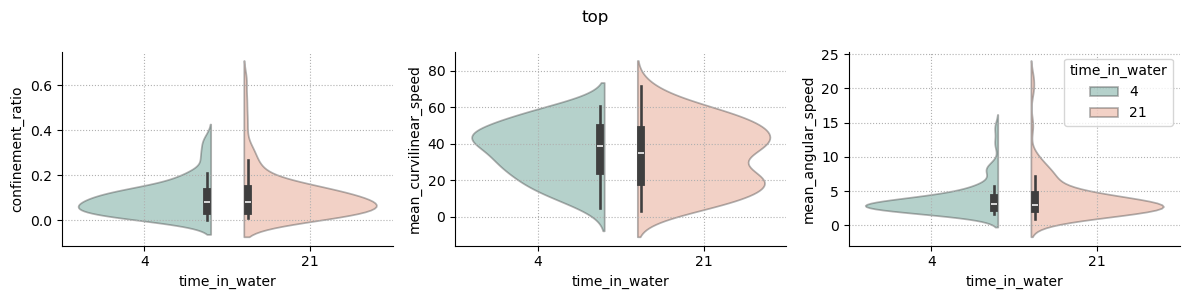

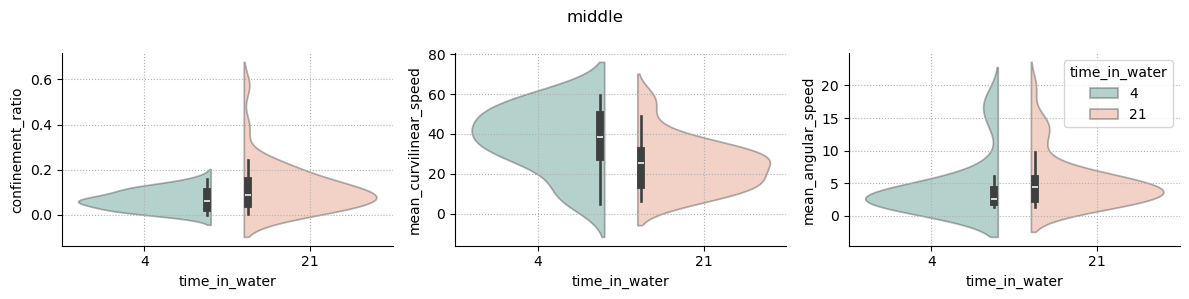

In [5]:
positions_in_tube = motility_metrics_dataframe["position_in_tube"].unique().tolist()

# loop through experimental variables
# (position in tube and time in water)
for position_in_tube in positions_in_tube:
    # create figure
    ncols = len(metrics_subset)
    fig, axes = plt.subplots(
        ncols=ncols,
        figsize=(4 * ncols, 3),
    )

    # filter
    source = motility_metrics_dataframe.loc[
        motility_metrics_dataframe["position_in_tube"] == position_in_tube
    ]

    # loop through select metrics
    for i, metric in enumerate(metrics_subset):
        last = len(metrics_subset) - 1
        legend = True if i == last else False
        ylabel = "Percent" if i == 0 else ""

        # render violin plot
        sns.violinplot(
            data=source,
            x=variable,
            y=metric,
            hue=variable,
            palette=["#3B9886", "#F28360"],
            inner="box",
            split=True,
            legend=legend,
            alpha=0.4,
            ax=axes.flat[i],
        )

        # aesthetics
        axes[i].grid(ls=":")
        sns.despine(ax=axes[i])

    #
    fig.suptitle(position_in_tube)
    # add space between subplots
    plt.tight_layout()

## 2D analysis
---

#### Bivariate distributions

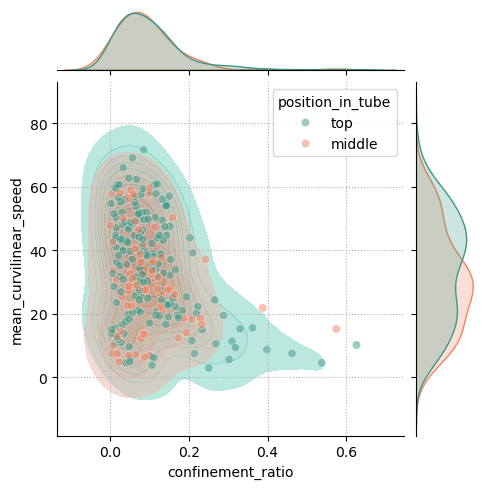

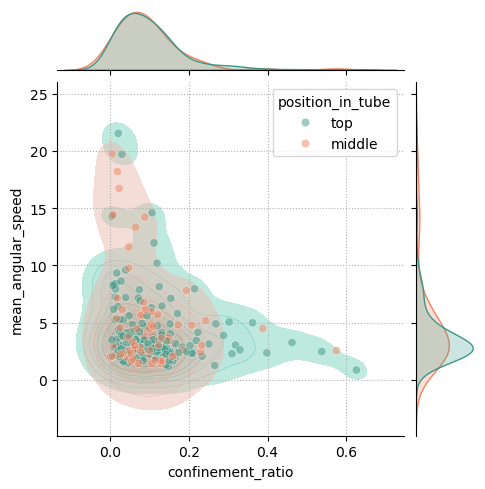

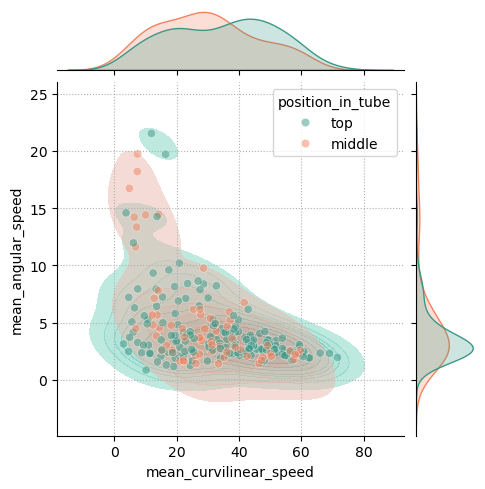

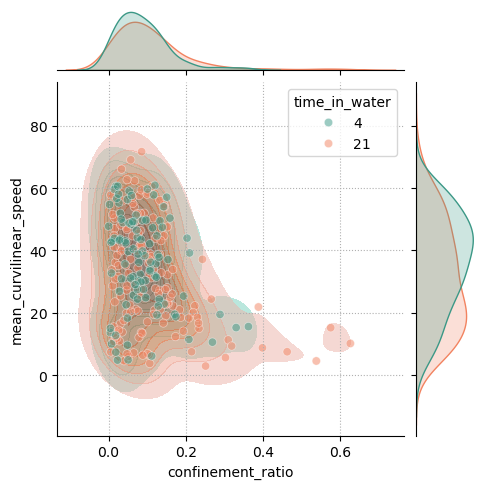

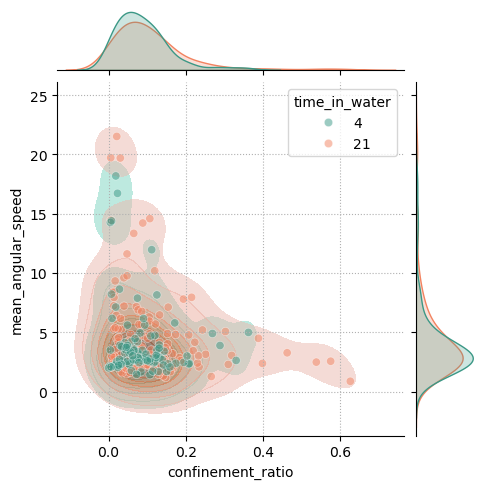

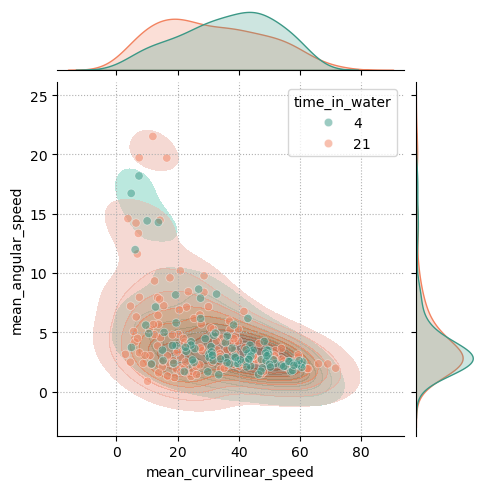

In [6]:
# loop through experimental variables
# (position in tube and time in water)
for variable in experimental_variables:
    # loop through combinations of metrics
    for metric_i, metric_j in combinations(metrics_subset, 2):
        # render joint distribution
        g = sns.JointGrid(
            data=motility_metrics_dataframe,
            x=metric_i,
            y=metric_j,
            hue=variable,
            palette=["#3B9886", "#F28360"],
            height=5,
        )

        # aesthetics
        g.plot_joint(sns.kdeplot, fill=True, alpha=0.5)
        g.plot_joint(sns.scatterplot, alpha=0.5, legend=True)
        g.plot_marginals(sns.kdeplot, fill=True, common_norm=False)
        g.ax_joint.grid(ls=":")